<b><h3>Introduction</h3></b>

Based on input features like gender, age, various diseases, and smoking status, this dataset is used to predict whether a patient is likely to get a stroke. 

About the Data: Each row in the data contains important details about an individual, such as age, gender, smoking status, and stroke occurrence.

<br></br>
<b><h2>Phase1: Data analysis & preparation</h2></b>

<br></br>
<b><h2>Importing Python Libraries</h2></b>

In [1]:
import random
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
import missingno as msno
import os

import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

<br></br>
<b><h2>Loading the Data</h2></b>

In [2]:
# Load dataset
df = pd.read_csv('stroke_data.csv', delimiter = ',')
print(df.shape)
df.head(10)

(40910, 11)


,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


<br></br>
<b><h2>Insights</h2></b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [4]:
df.describe(include="all")

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,0.555162,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,0.496954,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [5]:
# df.loc[:, "DeadlineRespected"].value_counts(normalize=True) * 100
df.loc[:, "stroke"].value_counts()

1    20460
0    20450
Name: stroke, dtype: int64

In [6]:
(df.loc[:, "stroke"] == 1).sum()

20460

<br></br>
<b><h2>Data Cleaning</h2></b>

In [7]:
# Check for missing data and duplicates
df.isnull().sum()
df.dropna(inplace = True)
df.shape
# print('Duplicates:', df.duplicated().sum())

(40907, 11)

<AxesSubplot:>

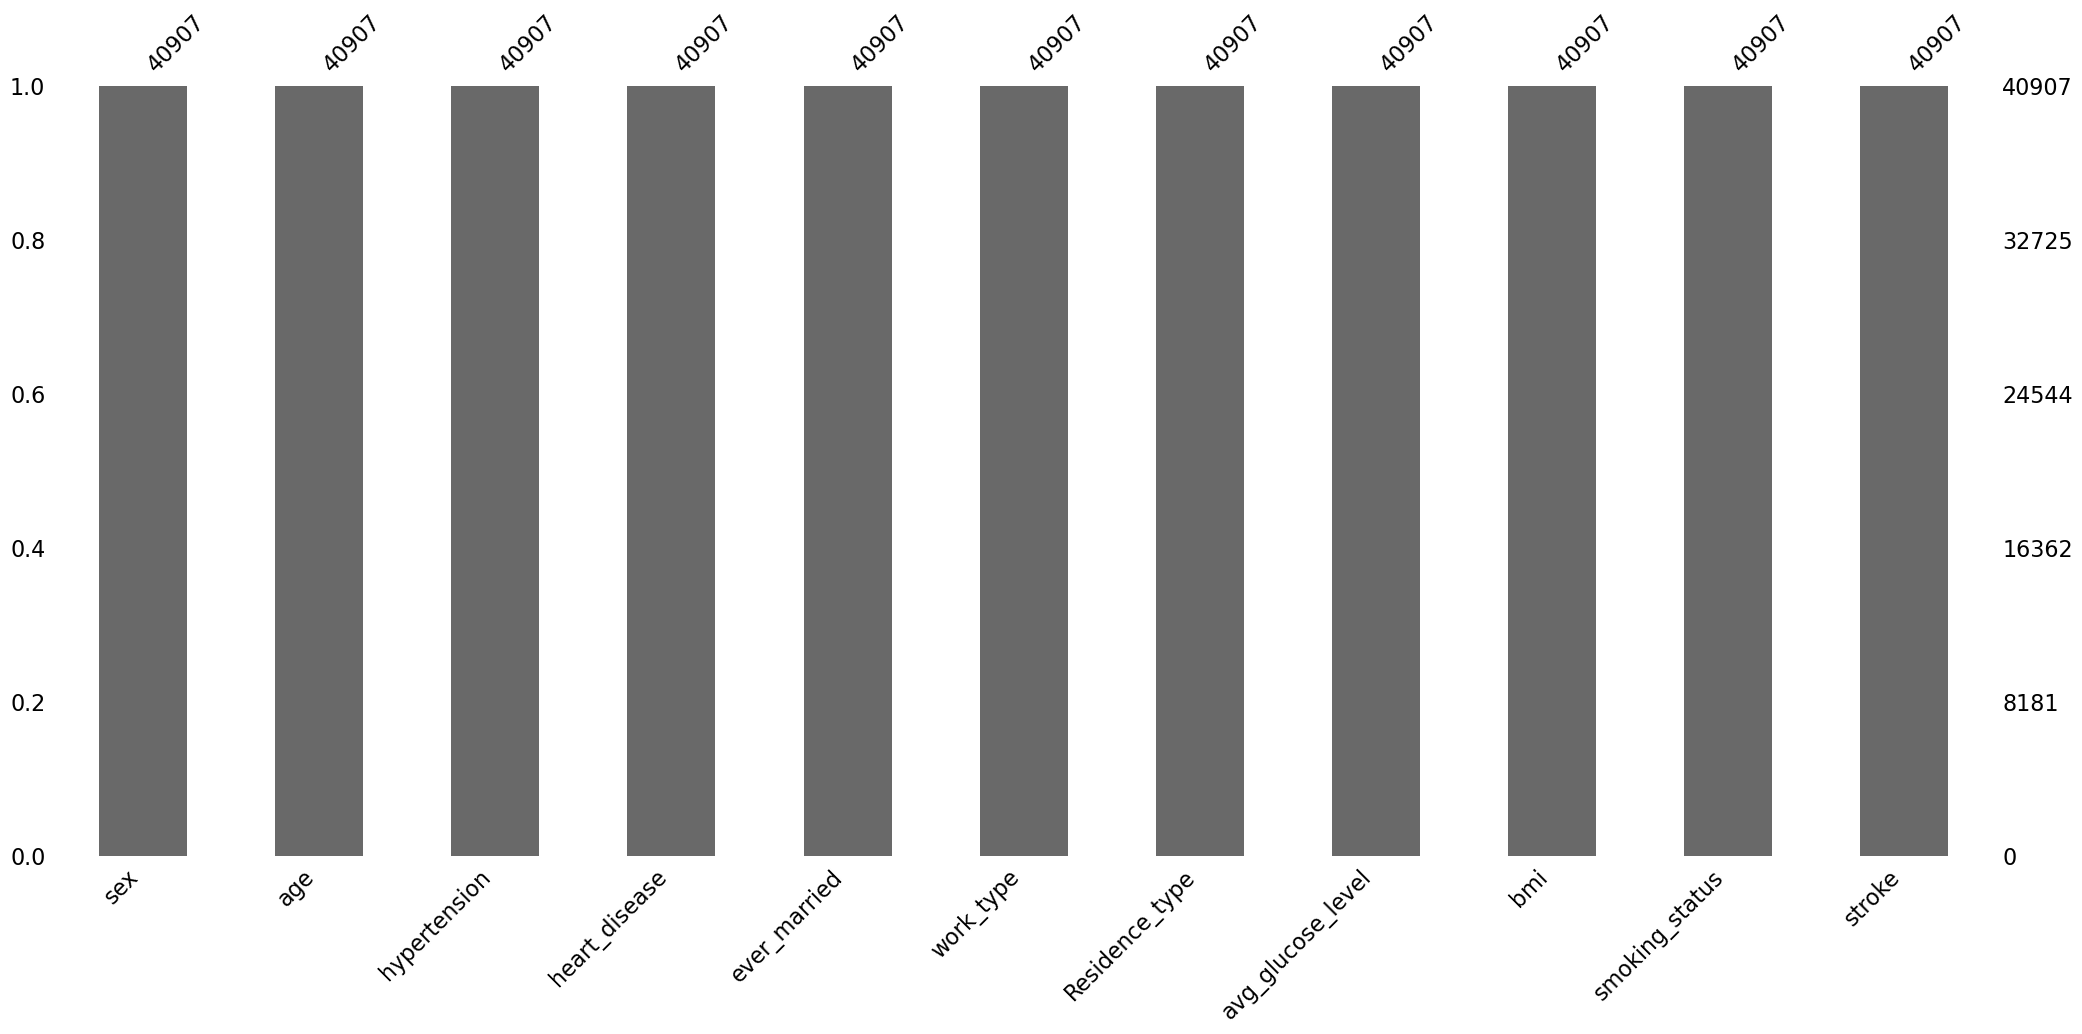

In [8]:
msno.bar(df)

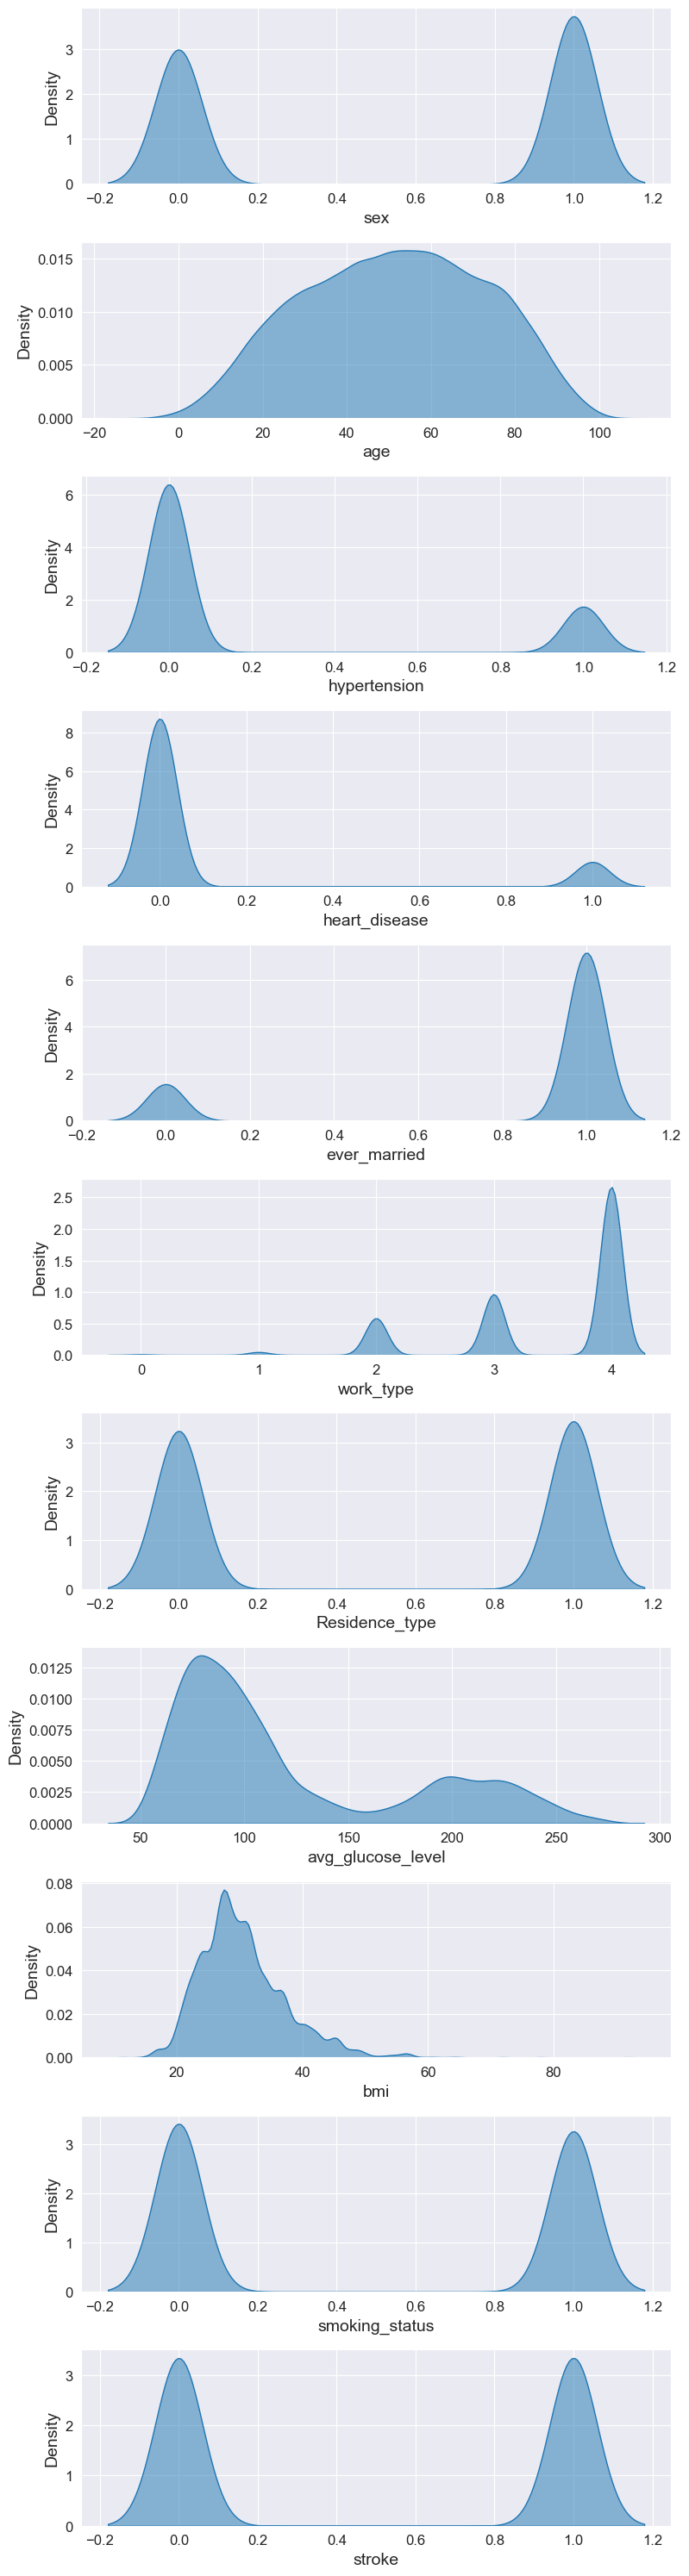

In [9]:
# Select the 11 features to plot
features = ["sex", "age", "hypertension", "heart_disease", "ever_married", 
            "work_type", "Residence_type", "avg_glucose_level", "bmi", "smoking_status", "stroke"]

# Set the plot style
sns.set_style("darkgrid")

# Create a subplot for each feature
fig, axs = plt.subplots(11, 1, figsize=(8, 30))

# Loop through each feature and plot the density chart
for i, feature in enumerate(features):
    sns.kdeplot(data=df, x=feature, ax=axs[i], fill=True, alpha=0.5)
    axs[i].set_xlabel(feature, fontsize=14)
    axs[i].set_ylabel("Density", fontsize=14)
    axs[i].tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='stroke', ylabel='count'>

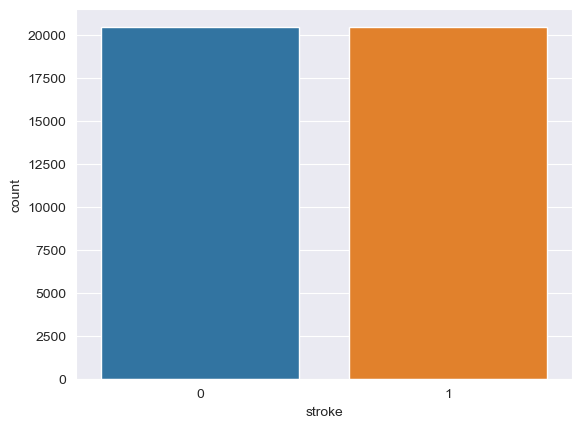

In [10]:
sns.countplot(data = df, x="stroke")

In [11]:
percentage = df.loc[:, "stroke"].value_counts(normalize=True) * 100
percentage

1    50.01589
0    49.98411
Name: stroke, dtype: float64

<b> Pie chart distribution of DeadlineRespected label </b>

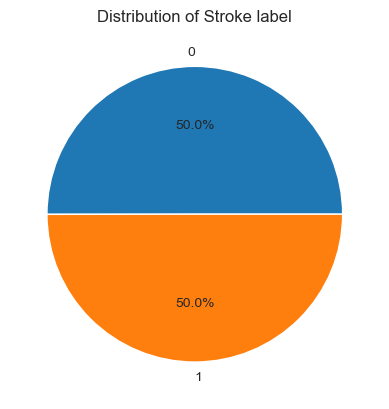

In [12]:
plt.pie(percentage, labels=["0", "1"], autopct = "%1.1f%%")
plt.title("Distribution of Stroke label")
plt.show()

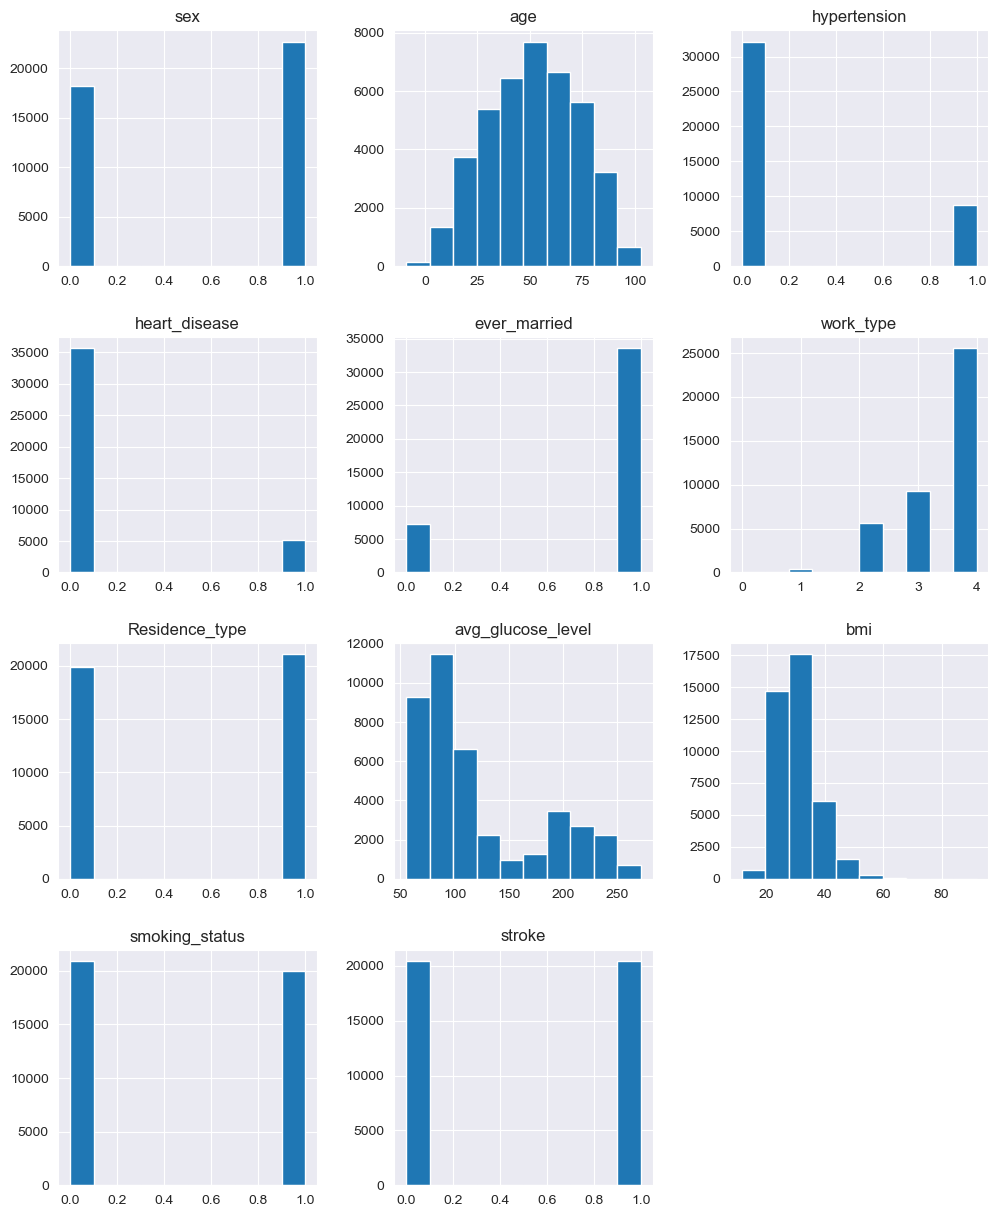

Above mean: 0.5001588970102916
Below mean: 0.49984110298970835


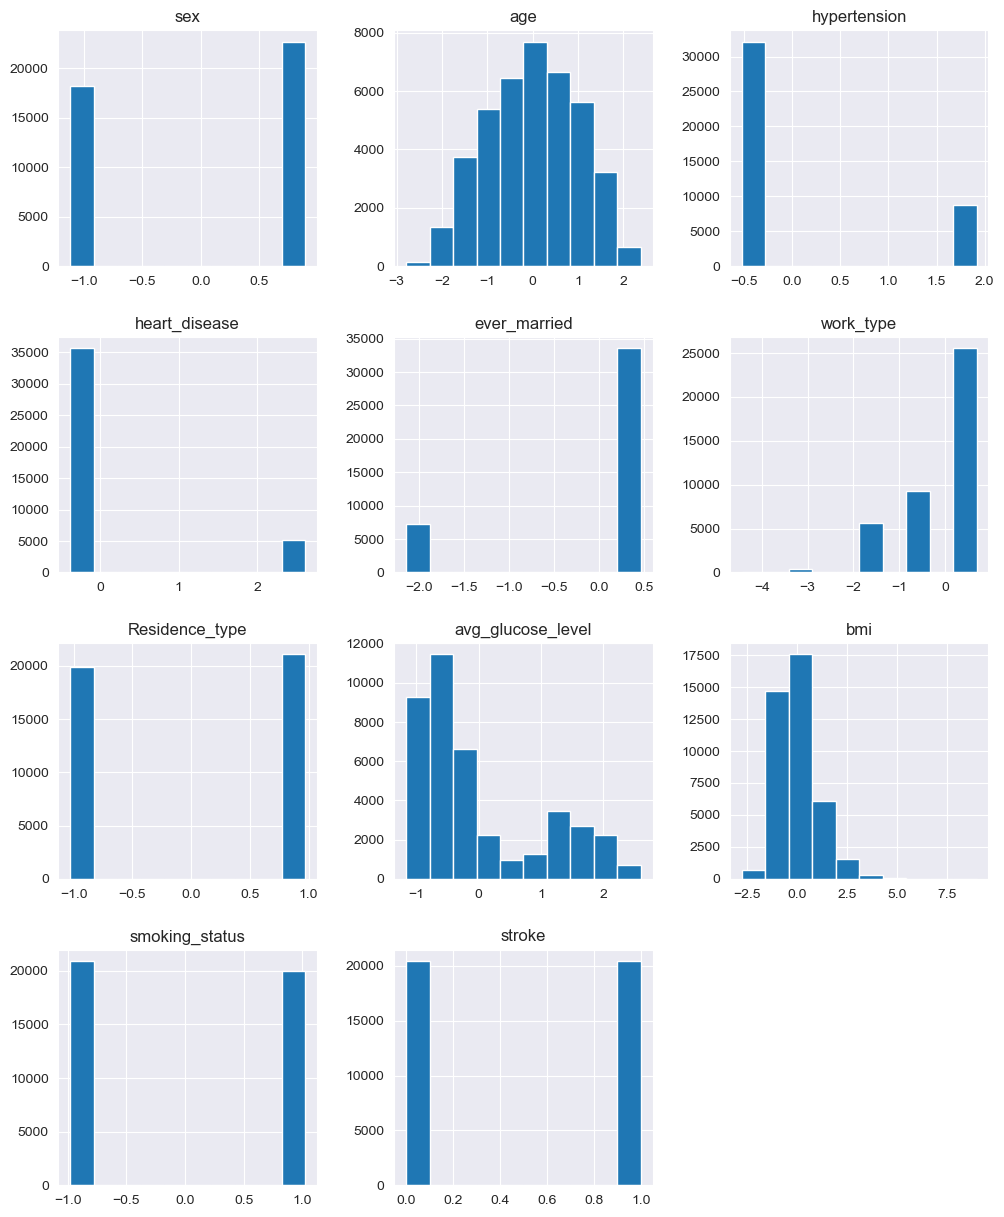

In [13]:
#Visualization before Normalization
df.hist(figsize=(12,15))
plt.show()


# Check balance of output labels
above_mean = (df['stroke'] > df['stroke'].mean()).sum()
below_mean = len(df) - above_mean
print('Above mean:', above_mean/len(df))
print('Below mean:', below_mean/len(df))

# # Normalize data
# min_val = min(df_new)
# max_val = max(df_new)
    
# # # Calculate the range of the data
# # data_range = max_val - min_val
    
    # Normalize the data
def z_score_normalization(column_name):
    series = df.loc[:, column_name]
    return (series - series.mean())/series.std()
    
# Iterates over all the continuous columns and applies z_score_normalization to each column
for column_name in df.columns:
    if column_name != "stroke":
        df[column_name] = z_score_normalization(column_name=column_name)

#Visualization after Normalization
df.hist(figsize=(12,15))
plt.show()


In [14]:
print(df.shape)

(40907, 11)


In [15]:
df.describe(include="all")

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,4.090700e+04,40907.000000
mean,3.956880e-15,-9.745113e-16,1.047496e-13,-1.623959e-16,1.750781e-14,1.187697e-15,-3.912126e-15,8.623756e-15,-7.403656e-14,-3.228383e-15,0.500159
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.500006
min,-1.117129e+00,-2.789809e+00,-5.215522e-01,-3.826602e-01,-2.143988e+00,-4.431995e+00,-1.030143e+00,-1.163263e+00,-2.766005e+00,-9.773867e-01,0.000000
25%,-1.117129e+00,-7.550488e-01,-5.215522e-01,-3.826602e-01,4.664090e-01,-5.904402e-01,-1.030143e+00,-7.527486e-01,-6.592958e-01,-9.773867e-01,0.000000
50%,8.951298e-01,3.110855e-02,-5.215522e-01,-3.826602e-01,4.664090e-01,6.900782e-01,9.707149e-01,-4.197161e-01,-1.472484e-01,-9.773867e-01,1.000000
75%,8.951298e-01,7.710213e-01,-5.215522e-01,-3.826602e-01,4.664090e-01,6.900782e-01,9.707149e-01,7.906320e-01,5.403580e-01,1.023112e+00,1.000000
max,8.951298e-01,2.389580e+00,1.917307e+00,2.613221e+00,4.664090e-01,6.900782e-01,9.707149e-01,2.599987e+00,9.011084e+00,1.023112e+00,1.000000


In [16]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<br></br>
<b><h2>Phase2: Build a model to overfit the entire dataset</h2></b>

In [148]:
# df_new = df.sample(frac=0.6)

In [232]:
# X = df_new.iloc[:, :-1].values
# y = df_new.iloc[:, -1].values

In [20]:
model = Sequential()

model.add(Dense(1, input_dim = df.shape[1] -1, activation = 'sigmoid'))
# model.add(Dense(16, activation = 'relu'))
# model.add(Dense(1, activation = 'sigmoid'))

In [21]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# checkpoint_file
# print(model.summary())

In [22]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.7204 - accuracy: 0.5904
Epoch 2/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.6040 - accuracy: 0.6826
Epoch 3/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5998 - accuracy: 0.6848
Epoch 4/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6835
Epoch 5/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6828
Epoch 6/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6836
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.6823
Epoch 8/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.6839
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5997 - accuracy: 0.6830
Epoch 10/100
1279/1279 [==============================] - 2s 2ms/step - l

In [23]:
history.history["accuracy"][99]

0.6821815371513367

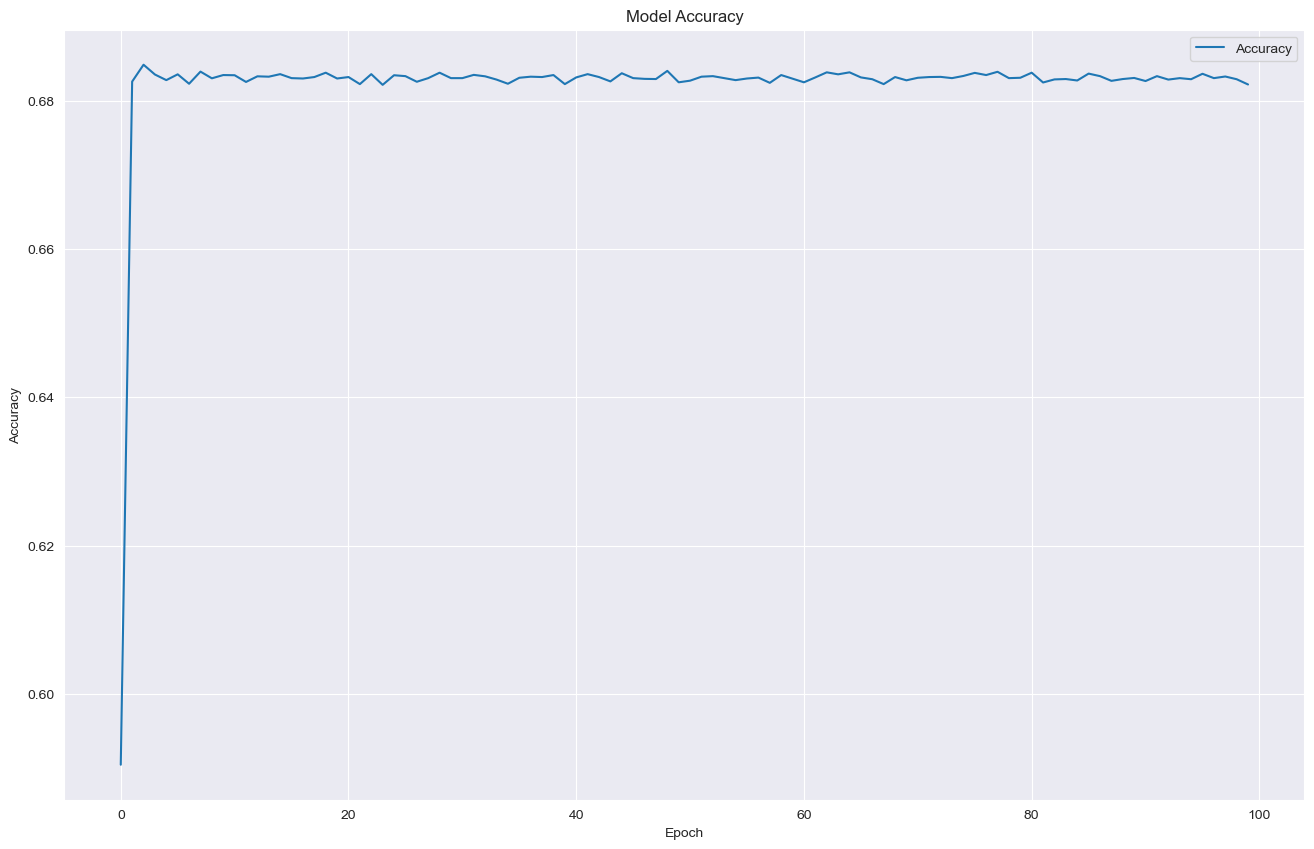

In [24]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'Accuracy': history.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data)

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [123]:
model1 = Sequential()

model1.add(Dense(8, activation="relu", input_dim=df.shape[1] - 1))
model1.add(Dense(4, activation="relu"))
model1.add(Dense(1, activation="sigmoid"))

model1.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [124]:
history1 = model1.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.6088 - accuracy: 0.6784
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5698 - accuracy: 0.7127
Epoch 3/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5583 - accuracy: 0.7172
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5530 - accuracy: 0.7158
Epoch 5/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7165
Epoch 6/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7180
Epoch 7/100
1279/1279 [==============================] - 4s 3ms/step - loss: 0.5436 - accuracy: 0.7191
Epoch 8/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5407 - accuracy: 0.7226
Epoch 9/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.5366 - accuracy: 0.7257
Epoch 10/100
1279/1279 [==============================] - 3s 2ms/step - l

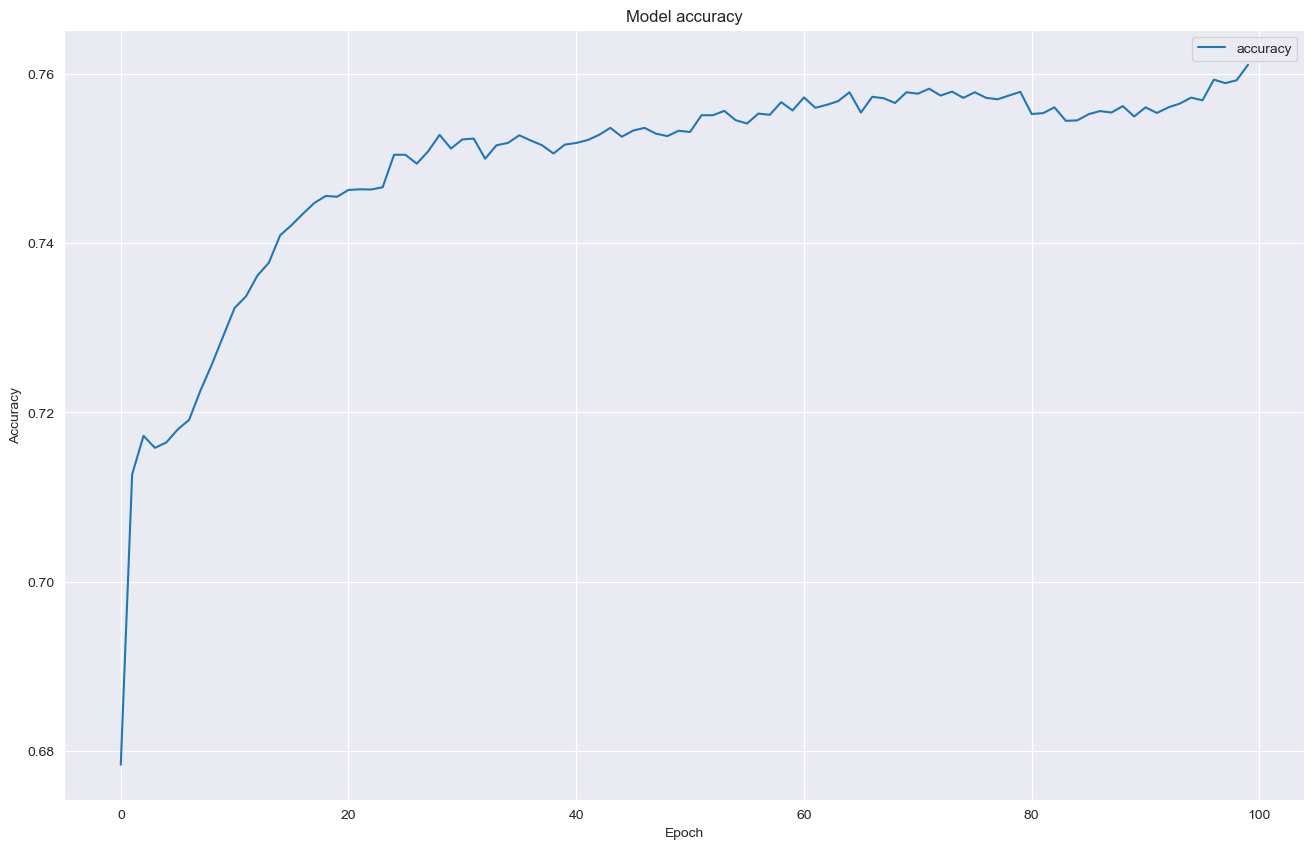

In [125]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history1.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [29]:
model2 = Sequential()

model2.add(Dense(32, activation="relu", input_dim=df.shape[1] - 1))
model2.add(Dense(16, activation="relu"))
model2.add(Dense(8, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [30]:
history2 = model2.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5590 - accuracy: 0.7085
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5082 - accuracy: 0.7379
Epoch 3/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.7654
Epoch 4/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.4256 - accuracy: 0.7930
Epoch 5/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.3909 - accuracy: 0.8135
Epoch 6/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3600 - accuracy: 0.8323
Epoch 7/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.3347 - accuracy: 0.8464
Epoch 8/100
1279/1279 [==============================] - 1s 1ms/step - loss: 0.3145 - accuracy: 0.8569
Epoch 9/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.2989 - accuracy: 0.8670
Epoch 10/100
1279/1279 [==============================] - 2s 1ms/step - l

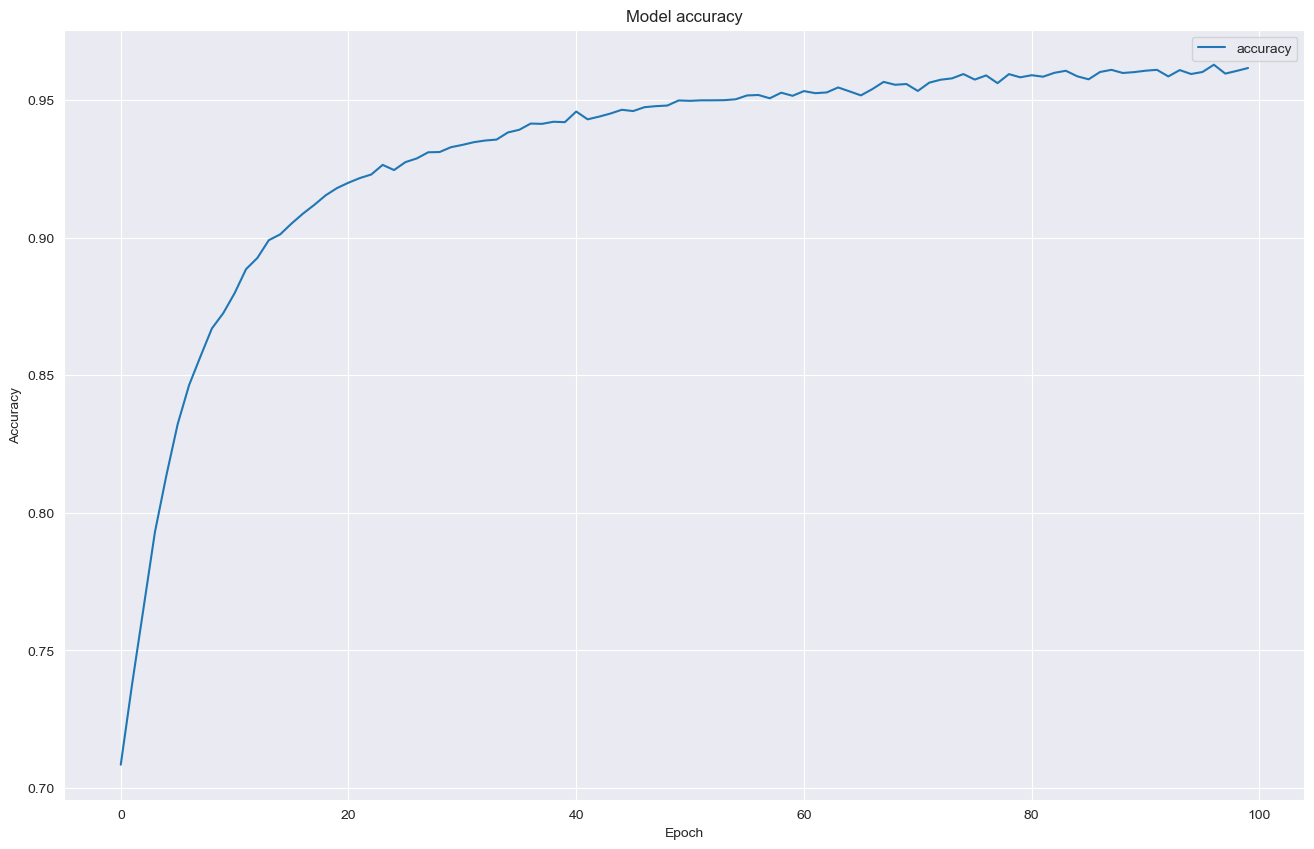

In [31]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history2.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [126]:
model3 = Sequential()

model3.add(Dense(40, activation="relu", input_dim=df.shape[1] - 1))
model3.add(Dense(18, activation="relu"))
model3.add(Dense(8, activation="relu"))
model3.add(Dense(4, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))


model3.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [127]:
history3 = model3.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 3s 1ms/step - loss: 0.5738 - accuracy: 0.6992
Epoch 2/100
1279/1279 [==============================] - 2s 1ms/step - loss: 0.5167 - accuracy: 0.7394
Epoch 3/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4835 - accuracy: 0.7607
Epoch 4/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.4551 - accuracy: 0.7806
Epoch 5/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4278 - accuracy: 0.7985
Epoch 6/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.4027 - accuracy: 0.8096
Epoch 7/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.3807 - accuracy: 0.8223
Epoch 8/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.3586 - accuracy: 0.8351
Epoch 9/100
1279/1279 [==============================] - 3s 3ms/step - loss: 0.3399 - accuracy: 0.8440
Epoch 10/100
1279/1279 [==============================] - 3s 3ms/step - l

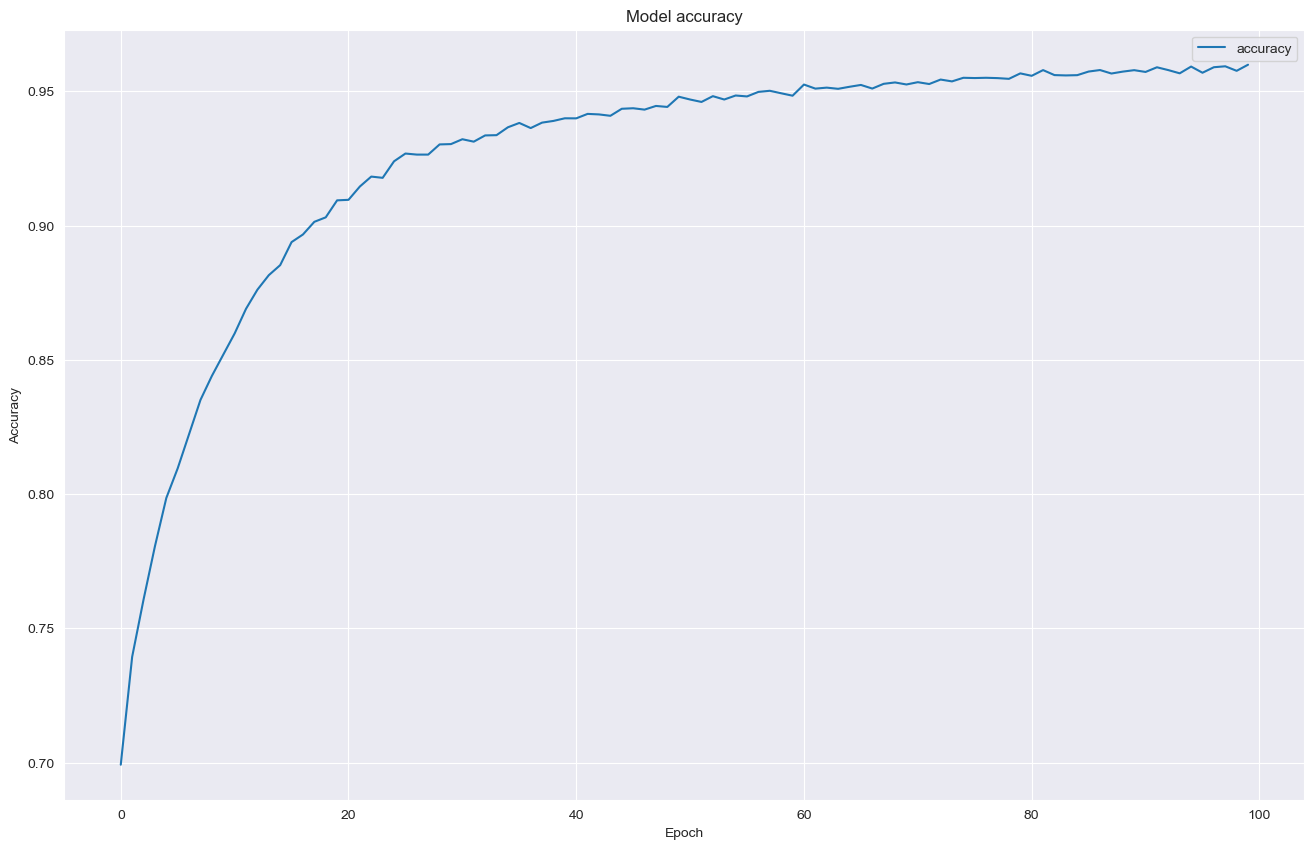

In [129]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history3.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [130]:
model4 = Sequential()

model4.add(Dense(128, activation="tanh", input_dim=df.shape[1] - 1))
model4.add(Dense(64, activation="tanh"))
model4.add(Dense(32, activation="tanh"))
model4.add(Dense(16, activation="tanh"))
model4.add(Dense(8, activation="tanh"))
model4.add(Dense(1, activation="sigmoid"))

model4.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [131]:
history4 = model4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 4s 2ms/step - loss: 0.5515 - accuracy: 0.7165
Epoch 2/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.4362 - accuracy: 0.7944
Epoch 3/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.3280 - accuracy: 0.8484
Epoch 4/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.2591 - accuracy: 0.8857
Epoch 5/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.2158 - accuracy: 0.9099
Epoch 6/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.1828 - accuracy: 0.9288
Epoch 7/100
1279/1279 [==============================] - 2s 2ms/step - loss: 0.1584 - accuracy: 0.9400
Epoch 8/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.1431 - accuracy: 0.9455
Epoch 9/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.1257 - accuracy: 0.9528
Epoch 10/100
1279/1279 [==============================] - 4s 3ms/step - l

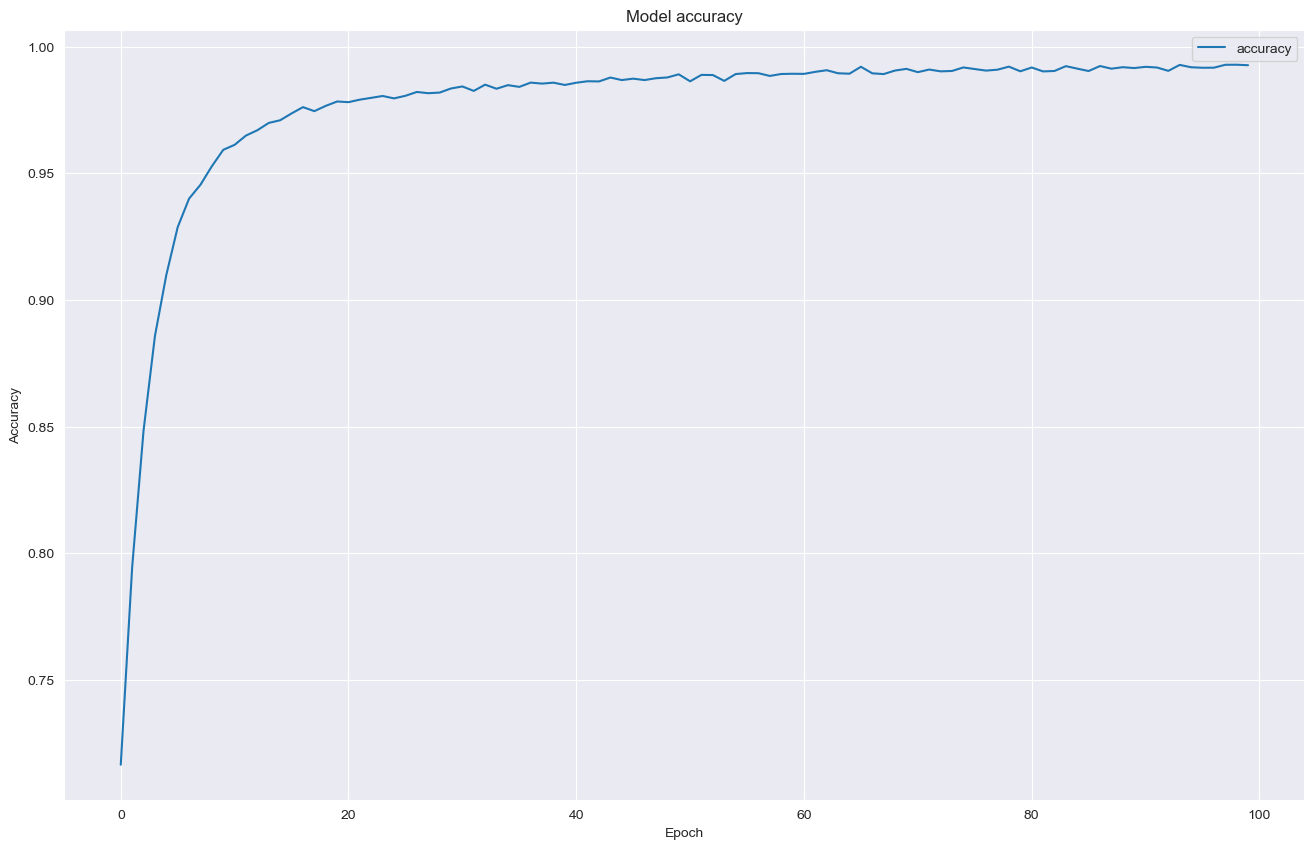

In [132]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history4.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

In [133]:
modelx = Sequential()

modelx.add(Dense(128, activation="tanh", input_dim=df.shape[1] - 1))
modelx.add(Dense(80, activation="tanh"))
modelx.add(Dense(64, activation="tanh"))
modelx.add(Dense(32, activation="tanh"))
modelx.add(Dense(16, activation="tanh"))
modelx.add(Dense(8, activation="tanh"))
modelx.add(Dense(1, activation="sigmoid"))

modelx.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [134]:
historyx = modelx.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
1279/1279 [==============================] - 4s 2ms/step - loss: 0.5388 - accuracy: 0.7221
Epoch 2/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.4052 - accuracy: 0.8068
Epoch 3/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.2861 - accuracy: 0.8730
Epoch 4/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.2161 - accuracy: 0.9111
Epoch 5/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.1714 - accuracy: 0.9325
Epoch 6/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.1443 - accuracy: 0.9453
Epoch 7/100
1279/1279 [==============================] - 3s 2ms/step - loss: 0.1292 - accuracy: 0.9529
Epoch 8/100
1279/1279 [==============================] - 5s 4ms/step - loss: 0.1179 - accuracy: 0.9576
Epoch 9/100
1279/1279 [==============================] - 4s 4ms/step - loss: 0.1059 - accuracy: 0.9616
Epoch 10/100
1279/1279 [==============================] - 4s 3ms/step - l

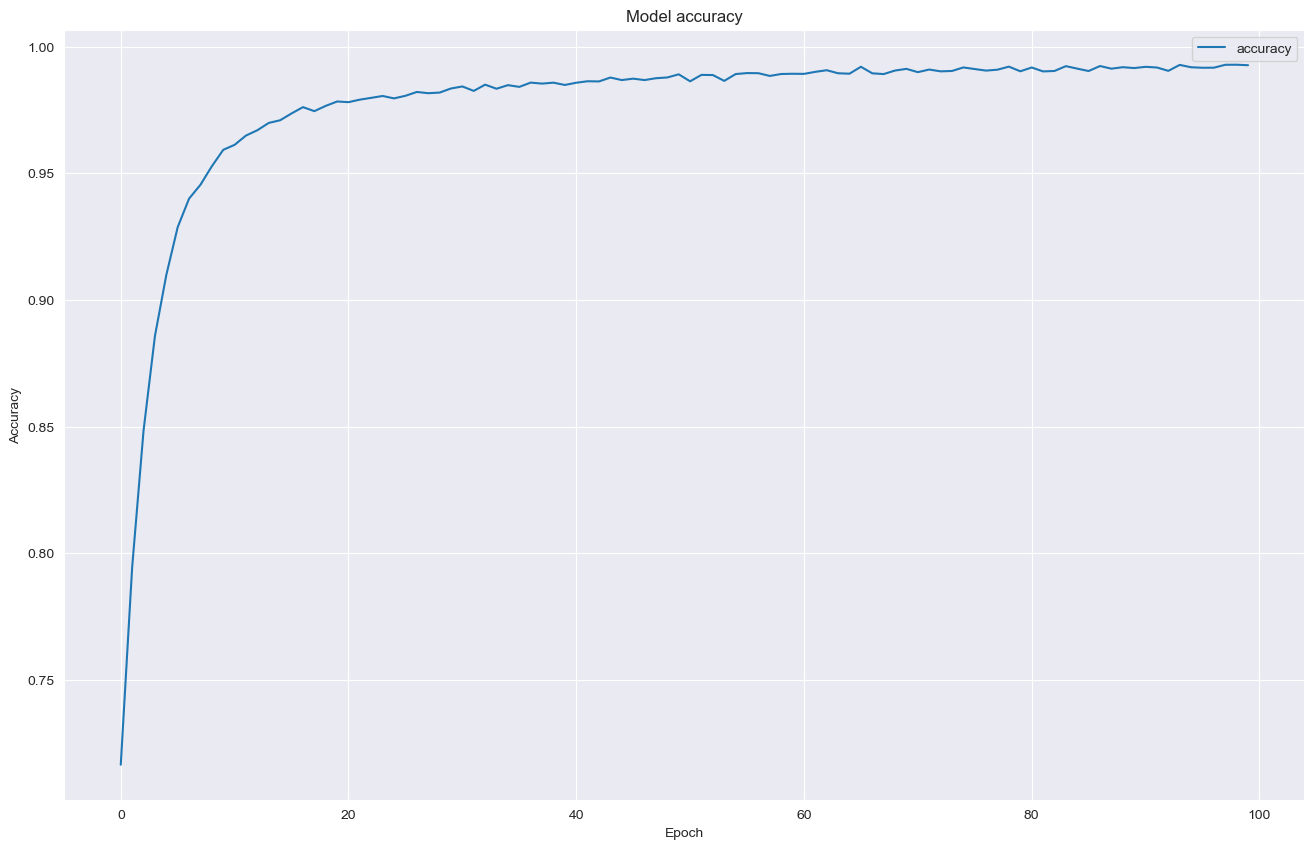

In [135]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'accuracy': history4.history['accuracy']})

plt.figure(figsize=(16, 10))

sns.lineplot(data=data1)

plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.show()

<h5>Observation</h5><br>


The model4 has given the best accuracy, a neural network with 6 layers for binary classification. It has 128 neurons in the input layer and uses the 'tanh' activation function. The 4 hidden layers have 64, 32, 16 and 8 neurons, respectively, and also use the 'tanh' activation function. The output layer has a single neuron and uses a 'sigmoid' activation function. The model uses binary cross-entropy loss function, Adam optimizer, and accuracy as the metric. The use of the 'tanh' activation function in the hidden layers suggests that the model can capture non-linear relationships between input features and the stroke(Output) variable.

The model4 shows the signs of better overfit and convergence at epochs 100 which has accuracy of 99.27 and there is no futher improvement in the accuracy(modelx).


<br></br>
<b><h2>Phase 3: Model selection & evaluation</h2></b>

<b><h4>Data Shuffling</h4></b>

In [39]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.895130,0.724777,-0.521552,-0.382660,0.466409,0.690078,0.970715,-0.985020,1.579083,1.023112,0
1,0.895130,0.447309,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.091027,-0.322808,-0.977387,0
2,-1.117129,-0.616315,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.675441,-1.346902,1.023112,0
3,0.895130,0.169842,-0.521552,2.613221,0.466409,0.690078,-1.030143,-0.369683,-0.147248,-0.977387,0
4,0.895130,0.123598,-0.521552,-0.382660,0.466409,0.690078,0.970715,0.162439,-0.893375,-0.977387,0
5,-1.117129,1.510934,-0.521552,-0.382660,-2.143988,-0.590440,-1.030143,1.426121,1.593713,1.023112,0
6,0.895130,-0.801293,-0.521552,-0.382660,0.466409,-1.870959,0.970715,-0.410682,-0.673926,1.023112,0
7,-1.117129,0.077353,-0.521552,-0.382660,0.466409,0.690078,-1.030143,1.768882,-0.322808,1.023112,0
8,0.895130,-0.061381,-0.521552,2.613221,0.466409,0.690078,0.970715,1.460519,-0.732445,-0.977387,0
9,-1.117129,0.031109,-0.521552,-0.382660,0.466409,0.690078,-1.030143,-0.857332,-0.293548,-0.977387,1


<b><h4>Data Splitting into TRAINING AND VALIDATION</h4></b>

In [42]:
index_20percent = int(0.2 * len(df.iloc[:, 0].values))
print(index_20percent)

XVALIDATION = df.iloc[:index_20percent, :-1].values
YVALIDATION = df.iloc[:index_20percent, -1].values

XTRAIN = df.iloc[index_20percent:, 0:-1].values
YTRAIN = df.iloc[index_20percent:, -1].values

8181


<b><h4>Single Layer Model</h4></b>

In [43]:
model5 = Sequential()

model5.add(Dense(1, input_dim=XTRAIN.shape[1], activation = "relu"))

In [45]:
model5.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [46]:
history5 = model5.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 994/1023 [============================>.] - ETA: 0s - loss: 3.9450 - accuracy: 0.6184
Epoch 1: val_loss improved from inf to 4.00617, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 3.9427 - accuracy: 0.6184 - val_loss: 4.0062 - val_accuracy: 0.6122
Epoch 2/100
1003/1023 [============================>.] - ETA: 0s - loss: 3.8820 - accuracy: 0.6215
Epoch 2: val_loss improved from 4.00617 to 3.96650, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 3.8755 - accuracy: 0.6220 - val_loss: 3.9665 - val_accuracy: 0.6119
Epoch 3/100
1001/1023 [============================>.] - ETA: 0s - loss: 3.7686 - accuracy: 0.6260
Epoch 3: val_loss improved from 3.96650 to 3.81602, saving model to best_model.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 3.7693 - accuracy: 0.6259 - val_loss: 3.8160 - val_accuracy: 0.6202
Epoch 4/100
1007/1023 [============================>.] -

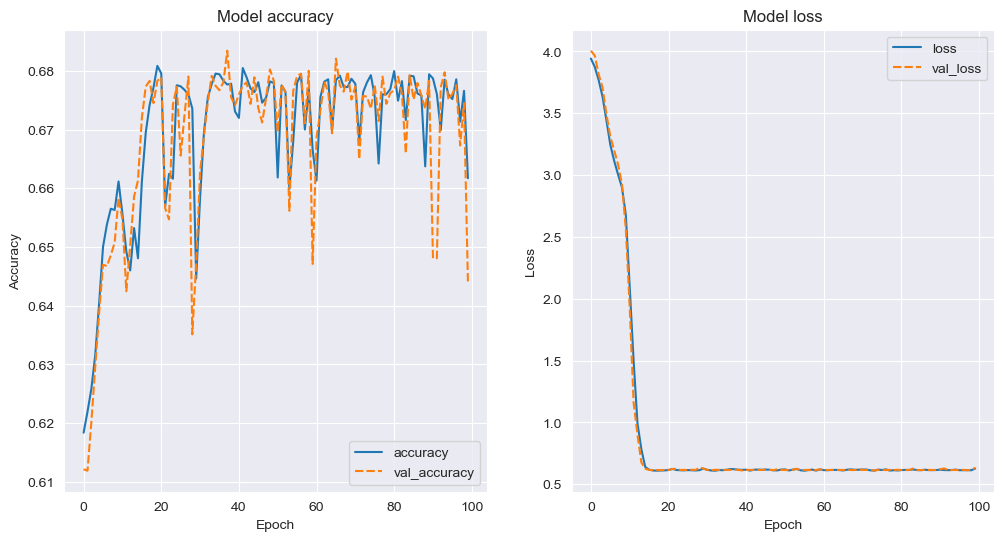

In [110]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history5.history['accuracy'], 'val_accuracy': history5.history['val_accuracy']})

# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'loss': history5.history['loss'], 'val_loss': history5.history['val_loss']})

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=data, ax=axes[0])
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=data1, ax=axes[1])
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [48]:
model6 = Sequential()

model6.add(Dense(8, input_dim=XTRAIN.shape[1], activation = "relu"))
model6.add(Dense(4, activation = "relu"))
model6.add(Dense(1, activation = "sigmoid"))

In [49]:
XTRAIN.shape, XVALIDATION.shape

((32726, 10), (8181, 10))

In [50]:
model6.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_model_1.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [51]:
history6 = model6.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.6372 - accuracy: 0.6592
Epoch 1: val_loss improved from inf to 0.60248, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.6364 - accuracy: 0.6602 - val_loss: 0.6025 - val_accuracy: 0.6965
Epoch 2/100
1018/1023 [============================>.] - ETA: 0s - loss: 0.5856 - accuracy: 0.7082
Epoch 2: val_loss improved from 0.60248 to 0.57639, saving model to best_model_1.hdf5
1023/1023 [==============================] - 1s 1ms/step - loss: 0.5856 - accuracy: 0.7082 - val_loss: 0.5764 - val_accuracy: 0.7054
Epoch 3/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.5667 - accuracy: 0.7146
Epoch 3: val_loss improved from 0.57639 to 0.56533, saving model to best_model_1.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5663 - accuracy: 0.7149 - val_loss: 0.5653 - val_accuracy: 0.7108
Epoch 4/100
 976/1023 [===========================

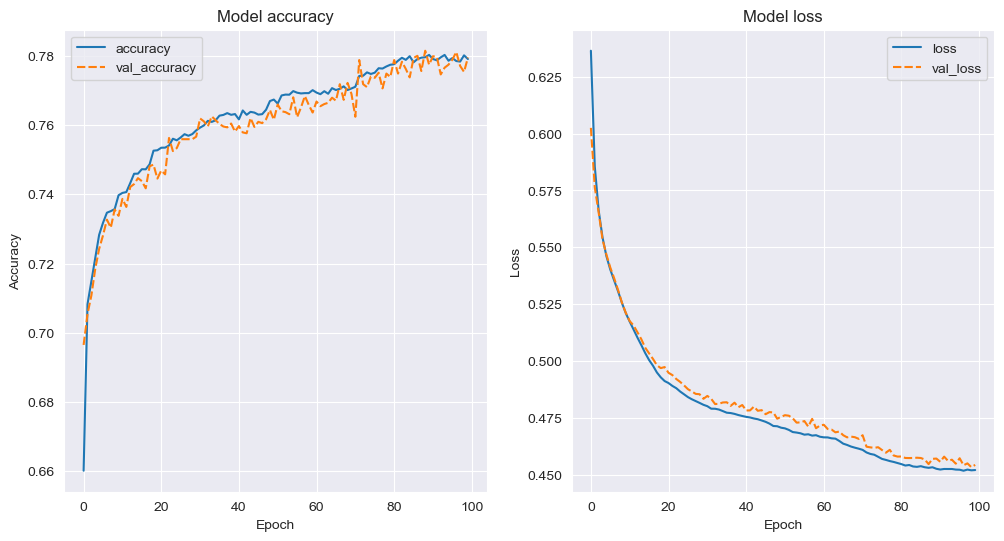

In [111]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history6.history['accuracy'], 'val_accuracy': history6.history['val_accuracy']})

# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'loss': history6.history['loss'], 'val_loss': history6.history['val_loss']})

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=data, ax=axes[0])
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=data1, ax=axes[1])
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [54]:
model7 = Sequential()

model7.add(Dense(32, input_dim=XTRAIN.shape[1], activation = "relu"))
model7.add(Dense(16, activation = "relu"))
model7.add(Dense(8, activation = "relu"))
model7.add(Dense(1, activation = "sigmoid"))

In [55]:
model7.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [56]:
history7 = model7.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1012/1023 [============================>.] - ETA: 0s - loss: 0.5709 - accuracy: 0.6983
Epoch 1: val_loss improved from inf to 0.53655, saving model to best_weights.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5706 - accuracy: 0.6984 - val_loss: 0.5365 - val_accuracy: 0.7238
Epoch 2/100
 974/1023 [===========================>..] - ETA: 0s - loss: 0.5153 - accuracy: 0.7369
Epoch 2: val_loss improved from 0.53655 to 0.50521, saving model to best_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5144 - accuracy: 0.7378 - val_loss: 0.5052 - val_accuracy: 0.7405
Epoch 3/100
1004/1023 [============================>.] - ETA: 0s - loss: 0.4845 - accuracy: 0.7601
Epoch 3: val_loss improved from 0.50521 to 0.48255, saving model to best_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4840 - accuracy: 0.7609 - val_loss: 0.4826 - val_accuracy: 0.7585
Epoch 4/100
1021/1023 [===========================

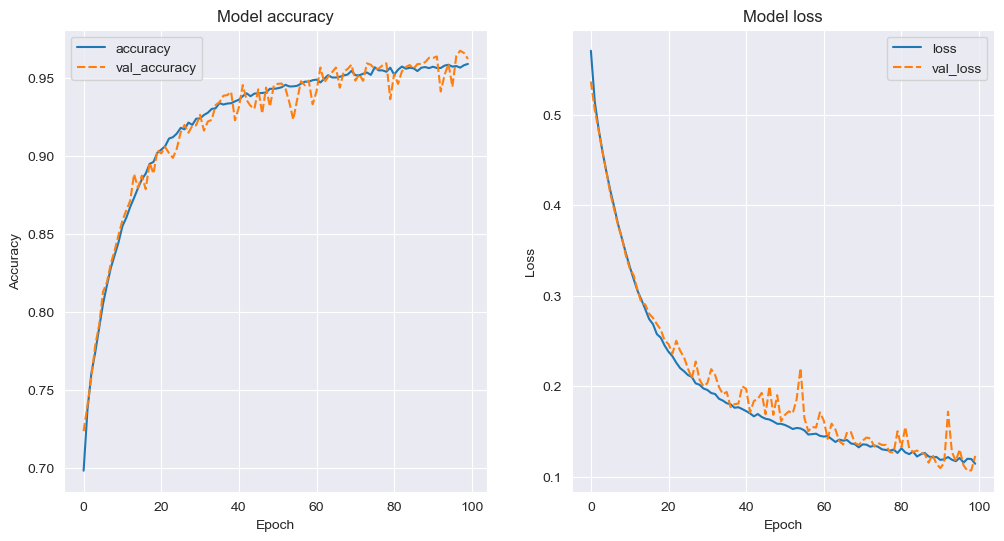

In [112]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history7.history['accuracy'], 'val_accuracy': history7.history['val_accuracy']})

# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'loss': history7.history['loss'], 'val_loss': history7.history['val_loss']})

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=data, ax=axes[0])
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=data1, ax=axes[1])
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [58]:
model8 = Sequential()

model8.add(Dense(36, input_dim=XTRAIN.shape[1], activation = "relu"))
model8.add(Dense(18, activation = "relu"))
model8.add(Dense(8, activation = "relu"))
model8.add(Dense(1, activation = "sigmoid"))

In [59]:
model8.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_point.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [60]:
history8 = model8.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 994/1023 [============================>.] - ETA: 0s - loss: 0.5741 - accuracy: 0.6998
Epoch 1: val_loss improved from inf to 0.54430, saving model to best_point.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5739 - accuracy: 0.6998 - val_loss: 0.5443 - val_accuracy: 0.7275
Epoch 2/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.5186 - accuracy: 0.7399
Epoch 2: val_loss improved from 0.54430 to 0.50220, saving model to best_point.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5185 - accuracy: 0.7400 - val_loss: 0.5022 - val_accuracy: 0.7383
Epoch 3/100
1004/1023 [============================>.] - ETA: 0s - loss: 0.4858 - accuracy: 0.7578
Epoch 3: val_loss improved from 0.50220 to 0.47625, saving model to best_point.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4858 - accuracy: 0.7580 - val_loss: 0.4762 - val_accuracy: 0.7642
Epoch 4/100
 977/1023 [===========================>..] -

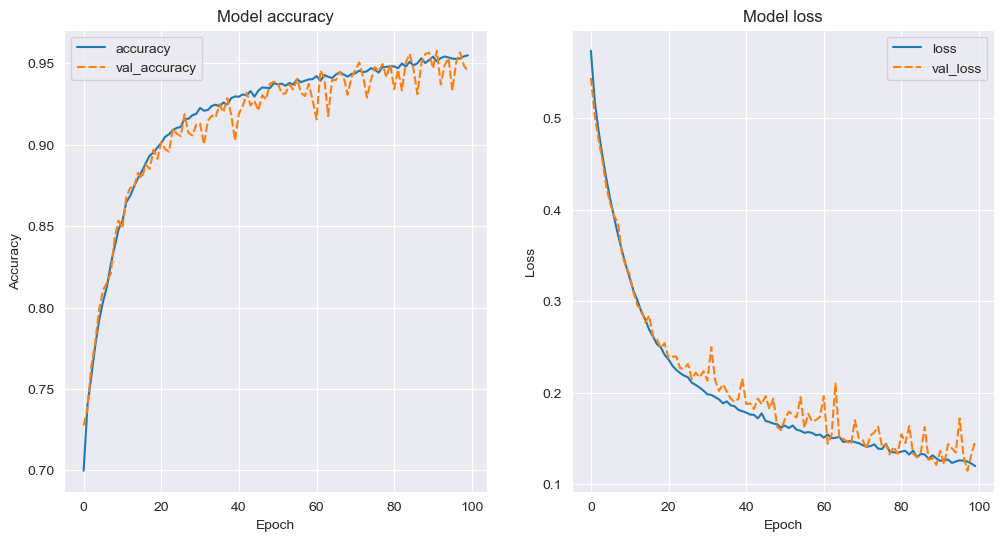

In [113]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history8.history['accuracy'], 'val_accuracy': history8.history['val_accuracy']})

# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'loss': history8.history['loss'], 'val_loss': history8.history['val_loss']})

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=data, ax=axes[0])
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=data1, ax=axes[1])
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [62]:
model9 = Sequential()

model9.add(Dense(64, input_dim=XTRAIN.shape[1], activation = "tanh"))
model9.add(Dense(32, activation = "tanh"))
model9.add(Dense(16, activation = "tanh"))
model9.add(Dense(8, activation = "tanh"))
model9.add(Dense(1, activation = "sigmoid"))

In [63]:
model9.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_position.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [64]:
history9 = model9.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
1003/1023 [============================>.] - ETA: 0s - loss: 0.5826 - accuracy: 0.6948
Epoch 1: val_loss improved from inf to 0.55702, saving model to best_position.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5825 - accuracy: 0.6943 - val_loss: 0.5570 - val_accuracy: 0.6998
Epoch 2/100
1018/1023 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7284
Epoch 2: val_loss improved from 0.55702 to 0.51741, saving model to best_position.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5350 - accuracy: 0.7281 - val_loss: 0.5174 - val_accuracy: 0.7376
Epoch 3/100
 994/1023 [============================>.] - ETA: 0s - loss: 0.4975 - accuracy: 0.7547
Epoch 3: val_loss improved from 0.51741 to 0.48177, saving model to best_position.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4963 - accuracy: 0.7554 - val_loss: 0.4818 - val_accuracy: 0.7671
Epoch 4/100
 981/1023 [========================

In [65]:
accuracy_allFeatures = history9.history['val_accuracy'][99]
accuracy_allFeatures

0.9898545145988464

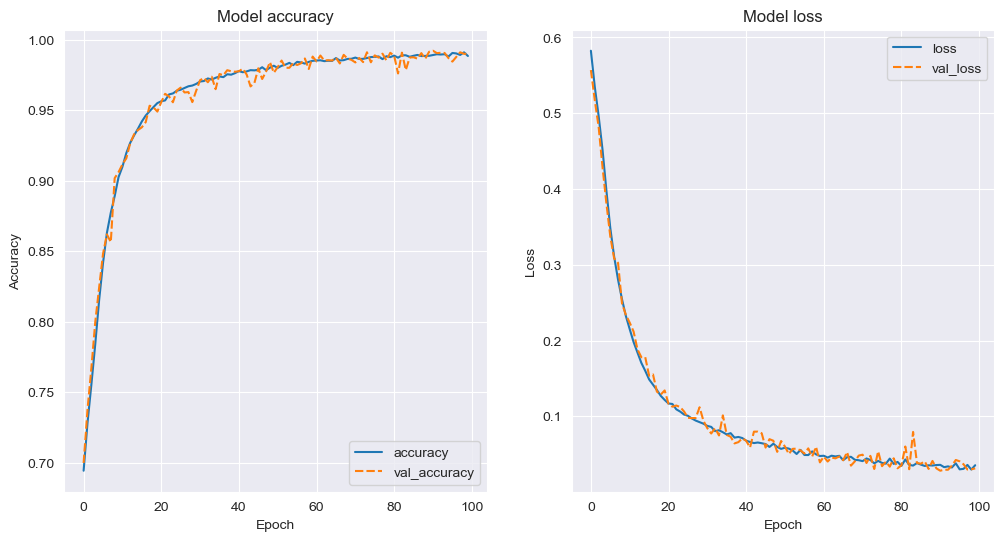

In [114]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history9.history['accuracy'], 'val_accuracy': history9.history['val_accuracy']})

# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'loss': history9.history['loss'], 'val_loss': history9.history['val_loss']})

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=data, ax=axes[0])
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=data1, ax=axes[1])
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [67]:
model10 = Sequential()

model10.add(Dense(128, input_dim=XTRAIN.shape[1], activation = "tanh"))
model10.add(Dense(64, activation = "tanh"))
model10.add(Dense(32, activation = "tanh"))
model10.add(Dense(16, activation = "tanh"))
model10.add(Dense(8, activation = "tanh"))
model10.add(Dense(1, activation = "sigmoid"))

In [68]:
model10.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define checkpoint callback
checkpoint_callback = ModelCheckpoint("best_Weights_of_model10.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [69]:
history10 = model10.fit(XTRAIN, YTRAIN, epochs=100, validation_data=(XVALIDATION, YVALIDATION), callbacks=[checkpoint_callback])

Epoch 1/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.7090
Epoch 1: val_loss improved from inf to 0.51842, saving model to best_Weights_of_model10.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5607 - accuracy: 0.7096 - val_loss: 0.5184 - val_accuracy: 0.7431
Epoch 2/100
1015/1023 [============================>.] - ETA: 0s - loss: 0.4743 - accuracy: 0.7699
Epoch 2: val_loss improved from 0.51842 to 0.43088, saving model to best_Weights_of_model10.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4739 - accuracy: 0.7701 - val_loss: 0.4309 - val_accuracy: 0.7978
Epoch 3/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.3827 - accuracy: 0.8257
Epoch 3: val_loss improved from 0.43088 to 0.35741, saving model to best_Weights_of_model10.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.3817 - accuracy: 0.8261 - val_loss: 0.3574 - val_accuracy: 0.8446
Epoch 4/100
 997/

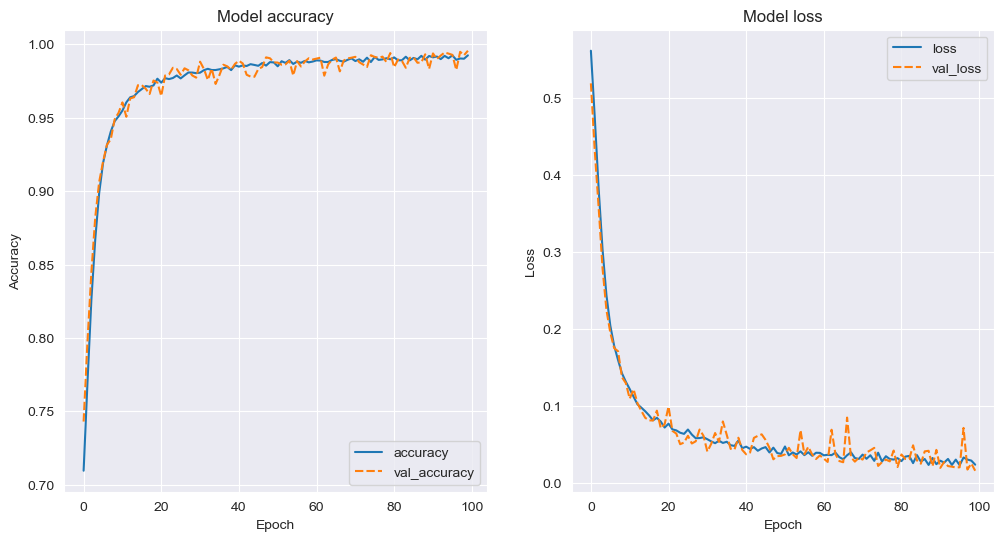

In [115]:
# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data = pd.DataFrame({'accuracy': history10.history['accuracy'], 'val_accuracy': history10.history['val_accuracy']})

# Create a pandas DataFrame with "accuracy" and "Val accuracy" columns
data1 = pd.DataFrame({'loss': history10.history['loss'], 'val_loss': history10.history['val_loss']})

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the first subplot
sns.lineplot(data=data, ax=axes[0])
axes[0].set_title('Model accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')

# Plot the second subplot
sns.lineplot(data=data1, ax=axes[1])
axes[1].set_title('Model loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')

# Show the plot
plt.show()

In [140]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [157]:
from sklearn.metrics import classification_report

model_names = ["model5", "model6", "model7", "model9", "model10"]
model_weights = ["best_model.hdf5", "best_model_1.hdf5", "best_weights.hdf5", "best_position.hdf5", "best_Weights_of_model10.hdf5"]
for model_name in model_names:
    model = globals()[model_name]
    for model_weight in model_weights:
#         weight = globals()[model_weight]
        # Load the saved best weights
        model.load_weights(model_weight)

        # Make predictions on the validation set
        YVALIDATION_PREDICTED = model.predict(XVALIDATION)
        YVALIDATION_PREDICTED = [1 if y>=0.5 else 0 for y in YVALIDATION_PREDICTED]

        # Generate classification report
        print(classification_report(YVALIDATION, YVALIDATION_PREDICTED))


256/256 [==============================] - 2s 7ms/step
              precision    recall  f1-score   support

           0       0.65      0.77      0.70      4098
           1       0.72      0.58      0.64      4083

    accuracy                           0.68      8181
   macro avg       0.68      0.68      0.67      8181
weighted avg       0.68      0.68      0.67      8181



ValueError: Layer count mismatch when loading weights from file. Model expected 1 layers, found 3 saved layers.

256/256 [==============================] - 0s 1ms/step


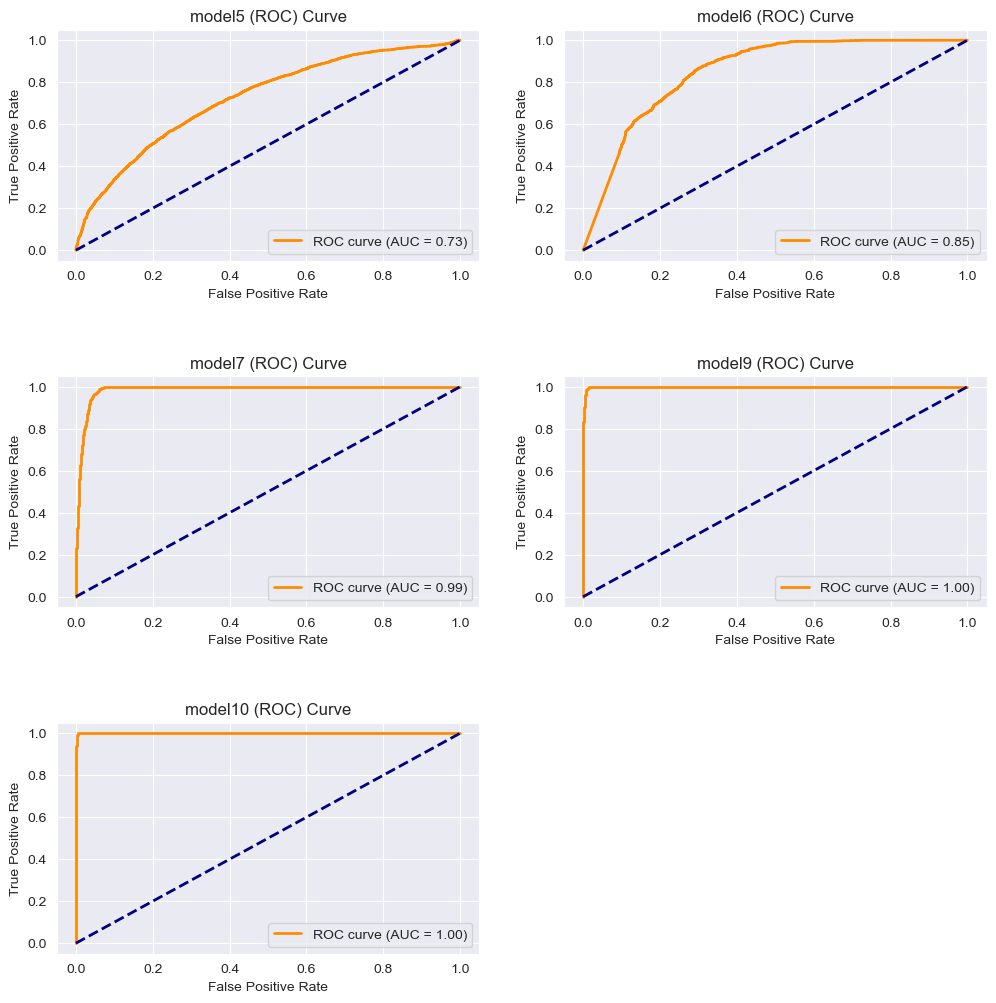

In [143]:
models = ["model5", "model6", "model7", "model9", "model10"]

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, model_name in enumerate(models):
    model = globals()[model_name]
    fpr, tpr, thresholds = roc_curve(YVALIDATION, model.predict(XVALIDATION))
    roc_auc = auc(fpr, tpr)
#     precision = precision_score(YVALIDATION, model.predict(XVALIDATION))
#     recall = recall_score(YVALIDATION, model.predict(XVALIDATION))
#     f1 = f1_score(YVALIDATION, model.predict(XVALIDATION))
    
    row = i // 2
    col = i % 2
    axs[row, col].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    axs[row, col].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[row, col].set_xlabel('False Positive Rate')
    axs[row, col].set_ylabel('True Positive Rate')
    axs[row, col].set_title(f'{model_name} (ROC) Curve')
    axs[row, col].legend(loc="lower right")
    
#     print(f'Precision: {precision:.2f}')
#     print(f'Recall: {recall:.2f}')
#     print(f'F1 score: {f1:.2f}')

plt.delaxes(axs[2][1])
plt.subplots_adjust(hspace=0.5)

plt.show()


<h5>Observation</h5><br>

<li>The above model of a training dataset gives the best Validation accuracy of 99.56 at 100th epoch, which has 6 layers.</li>
<li>Input layer consists of 128 neurons and "tanh" as an activation function.</li>
<li>The other 4 Dense layers have 64, 32, 16 and 8 neurons respectively with activation function "tanh".
Output layer has single neuron with activation function "sigmoid"

    
Sticking with the accuracy as there is no further improvement. 

<h2>Phase 4: Feature importance and reduction</h2>

In [74]:
model10.load_weights("best_Weights_of_model10.hdf5")

In [75]:
df.shape

(40907, 11)

In [76]:
from sklearn import metrics


def feature_importance():
    # Let's initialize the list to store the feature wise accuracy
    feature_accuracy = {}

    for index in range(XTRAIN.shape[1]):
        # Let's get the values corresponding to the each feature
        single_input_feature = XTRAIN[:, index]
        valid_input_feature = XVALIDATION[:, index]

        single_feature_model = Sequential()
        single_feature_model.add(Dense(128, input_dim=1, activation = "tanh"))
        single_feature_model.add(Dense(64, input_dim=1, activation = "tanh"))
        single_feature_model.add(Dense(32, input_dim=1, activation = "tanh"))
        single_feature_model.add(Dense(16, input_dim=1, activation = "tanh"))
        single_feature_model.add(Dense(8, input_dim=1, activation = "tanh"))
        single_feature_model.add(Dense(1, activation = "sigmoid"))

        # Let's build the model using binary_crossentropy as the loss function 
        # and accuracy as the evaluation metric during the compilation process
        single_feature_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics=["accuracy"])

        callback_a = ModelCheckpoint("model_feature1.hdf5", monitor="val_loss", save_best_only=True, save_weights_only=True, verbose=0)
#         callback_b = EarlyStopping(monitor="val_loss", mode="min", patience=20, verbose=0)

        print(f"Let's fit the sequential model on {df.columns[index]}")
        # Let's fit the sequential model with input features and output label
        history = single_feature_model.fit(
            x=single_input_feature, 
            y=YTRAIN, 
            validation_data=(valid_input_feature, YVALIDATION), 
            epochs=100, 
            batch_size=100, 
            callbacks=[callback_a], 
            verbose=0
        )
        # Let's predict on the validation inputs
        hypothesis = single_feature_model.predict(valid_input_feature, verbose=0)
        hypothesis = (hypothesis > 0.5)
        accuracy_score = metrics.accuracy_score(YVALIDATION, hypothesis)
        feature_accuracy[df.columns[index]] = accuracy_score

        print(f"Accuracy score corresponding to {df.columns[index]} --> {accuracy_score}")
        print()
    return feature_accuracy



In [77]:
# Let's call the feature_importance function to calulate the importance of each feature
feature_accuracy = feature_importance()

# Let's print the feature_accuracy dictionary
feature_accuracy

Let's fit the sequential model on sex
Accuracy score corresponding to sex --> 0.5493215988265493

Let's fit the sequential model on age
Accuracy score corresponding to age --> 0.5558000244468891

Let's fit the sequential model on hypertension
Accuracy score corresponding to hypertension --> 0.6077496638552744

Let's fit the sequential model on heart_disease
Accuracy score corresponding to heart_disease --> 0.5782911624495783

Let's fit the sequential model on ever_married
Accuracy score corresponding to ever_married --> 0.5655787801002322

Let's fit the sequential model on work_type
Accuracy score corresponding to work_type --> 0.5501772399462168

Let's fit the sequential model on Residence_type
Accuracy score corresponding to Residence_type --> 0.5131402029091798

Let's fit the sequential model on avg_glucose_level
Accuracy score corresponding to avg_glucose_level --> 0.6224177973352891

Let's fit the sequential model on bmi
Accuracy score corresponding to bmi --> 0.5610561056105611



{'sex': 0.5493215988265493,
 'age': 0.5558000244468891,
 'hypertension': 0.6077496638552744,
 'heart_disease': 0.5782911624495783,
 'ever_married': 0.5655787801002322,
 'work_type': 0.5501772399462168,
 'Residence_type': 0.5131402029091798,
 'avg_glucose_level': 0.6224177973352891,
 'bmi': 0.5610561056105611,
 'smoking_status': 0.5262192885955262}

{'Residence_type': 0.5131402029091798, 'smoking_status': 0.5262192885955262, 'sex': 0.5493215988265493, 'work_type': 0.5501772399462168, 'age': 0.5558000244468891, 'bmi': 0.5610561056105611, 'ever_married': 0.5655787801002322, 'heart_disease': 0.5782911624495783, 'hypertension': 0.6077496638552744, 'avg_glucose_level': 0.6224177973352891}
['Residence_type' 'smoking_status' 'sex' 'work_type' 'age' 'bmi'
 'ever_married' 'heart_disease' 'hypertension' 'avg_glucose_level']


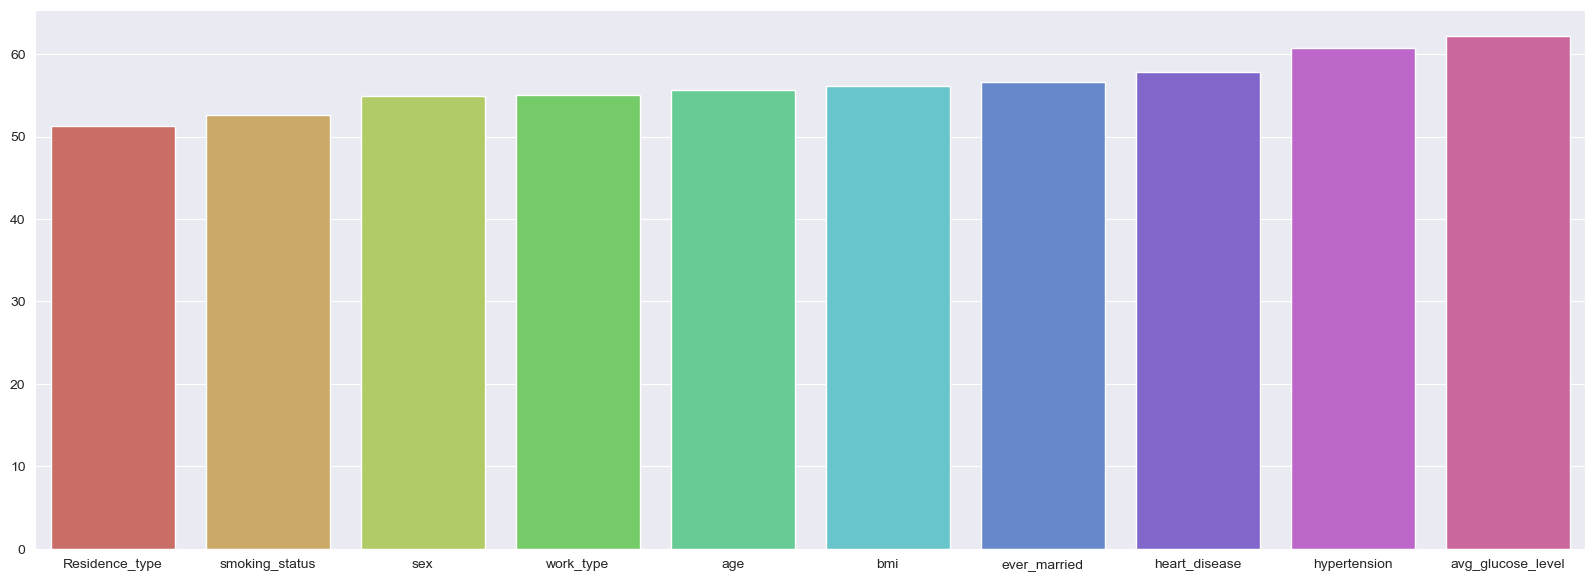

In [78]:
# Let's plot the barchart of different features on
# X-axis and corresponding accuracies on y-axis

sorted_feature_accuracy = {key: value for key, value in sorted(feature_accuracy.items(), key=lambda item: item[1])}
print(sorted_feature_accuracy)
sorted_features = np.array(list(sorted_feature_accuracy.keys()))
print(sorted_features)
plt.figure(figsize=(20, 7))

# Let's convert the acuuracies into percentages
feature_acc = np.array(list(sorted_feature_accuracy.values())) * 100

sns.barplot(x=list(sorted_feature_accuracy.keys()), y=feature_acc, palette="hls")
plt.show()

In [79]:
list(df.columns.values)

['sex',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke']

In [86]:
# Load dataset
df = pd.read_csv('stroke_data.csv', delimiter = ',')
print(df.shape)
df.head(10)
train_df = pd.DataFrame(XTRAIN, columns=df.columns.tolist()[:-1])
valid_df = pd.DataFrame(XVALIDATION, columns=df.columns.tolist()[:-1])

(40910, 11)


In [87]:
def feature_importance_and_reduction():
    accuracy_after_each_reduction = []
    Val_accuracy_after_each_reduction = []
    for index, feature in enumerate(sorted_features):
        
        if index == len(sorted_features):
            break
        train_df.drop(feature, axis=1, inplace=True)
        valid_df.drop(feature, axis=1, inplace=True)
        model_1 = Sequential()
        
        model_1.add(Dense(128, input_dim=train_df.shape[1], activation = "tanh"))
        model_1.add(Dense(64, activation = "tanh"))
        model_1.add(Dense(32, activation = "tanh"))
        model_1.add(Dense(16, activation = "tanh"))
        model_1.add(Dense(8, activation = "tanh"))
        model_1.add(Dense(1, activation = "sigmoid"))
        
        model_1.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

        # Define checkpoint callback
        checkpoint_callback = ModelCheckpoint("best_of_weights.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
        history_1 = model_1.fit(train_df.values, YTRAIN, epochs=100, validation_data=(valid_df.values, YVALIDATION), callbacks=[checkpoint_callback])
        
        accuracy_after_each_reduction.append({feature: history_1.history['accuracy']})
        Val_accuracy_after_each_reduction.append({feature: history_1.history['val_accuracy']})
        
    return accuracy_after_each_reduction, Val_accuracy_after_each_reduction
        

In [88]:
accuracy_data, Val_accuracy_data = feature_importance_and_reduction()

Epoch 1/100
 997/1023 [============================>.] - ETA: 0s - loss: 0.5717 - accuracy: 0.7082
Epoch 1: val_loss improved from inf to 0.55458, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 3s 2ms/step - loss: 0.5711 - accuracy: 0.7086 - val_loss: 0.5546 - val_accuracy: 0.7355
Epoch 2/100
 988/1023 [===========================>..] - ETA: 0s - loss: 0.5180 - accuracy: 0.7482
Epoch 2: val_loss improved from 0.55458 to 0.49056, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.5166 - accuracy: 0.7494 - val_loss: 0.4906 - val_accuracy: 0.7693
Epoch 3/100
1020/1023 [============================>.] - ETA: 0s - loss: 0.4577 - accuracy: 0.7872
Epoch 3: val_loss improved from 0.49056 to 0.42488, saving model to best_of_weights.hdf5
1023/1023 [==============================] - 2s 2ms/step - loss: 0.4575 - accuracy: 0.7874 - val_loss: 0.4249 - val_accuracy: 0.8009
Epoch 4/100
1012/1023 [==================

Accuracy
Residence_type: 0.9882662296295166
smoking_status: 0.982613205909729
sex: 0.9822160005569458
work_type: 0.9689849019050598
age: 0.9713377952575684
bmi: 0.7332701683044434
ever_married: 0.7134082913398743
heart_disease: 0.6895434856414795
hypertension: 0.6219519376754761
avg_glucose_level: 0.4929719567298889


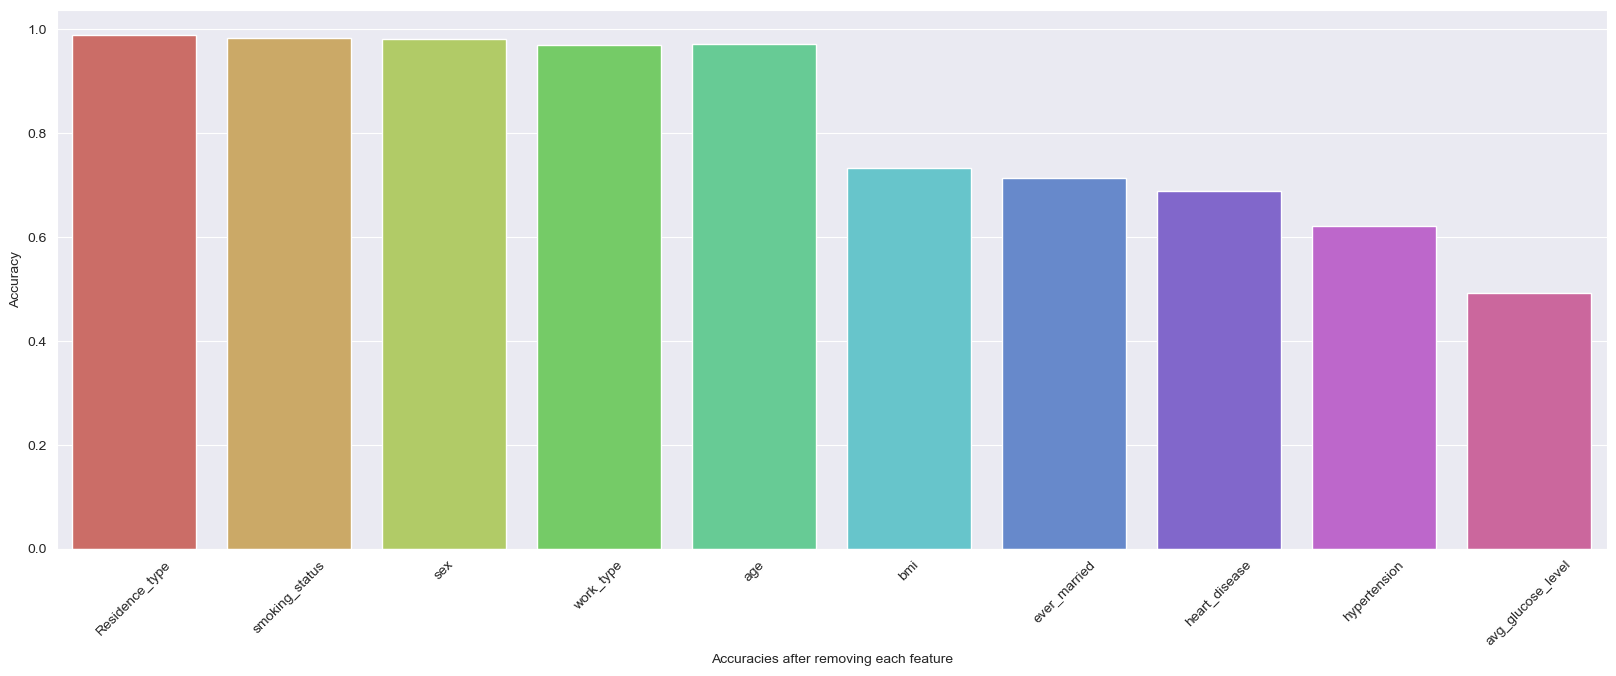


Validation Accuracy
Residence_type: 0.9874098300933838
smoking_status: 0.9828871488571167
sex: 0.9822760224342346
work_type: 0.9555066823959351
age: 0.9517173767089844
bmi: 0.7332844138145447
ever_married: 0.7122601270675659
heart_disease: 0.690135657787323
hypertension: 0.6170395016670227
avg_glucose_level: 0.4990832507610321


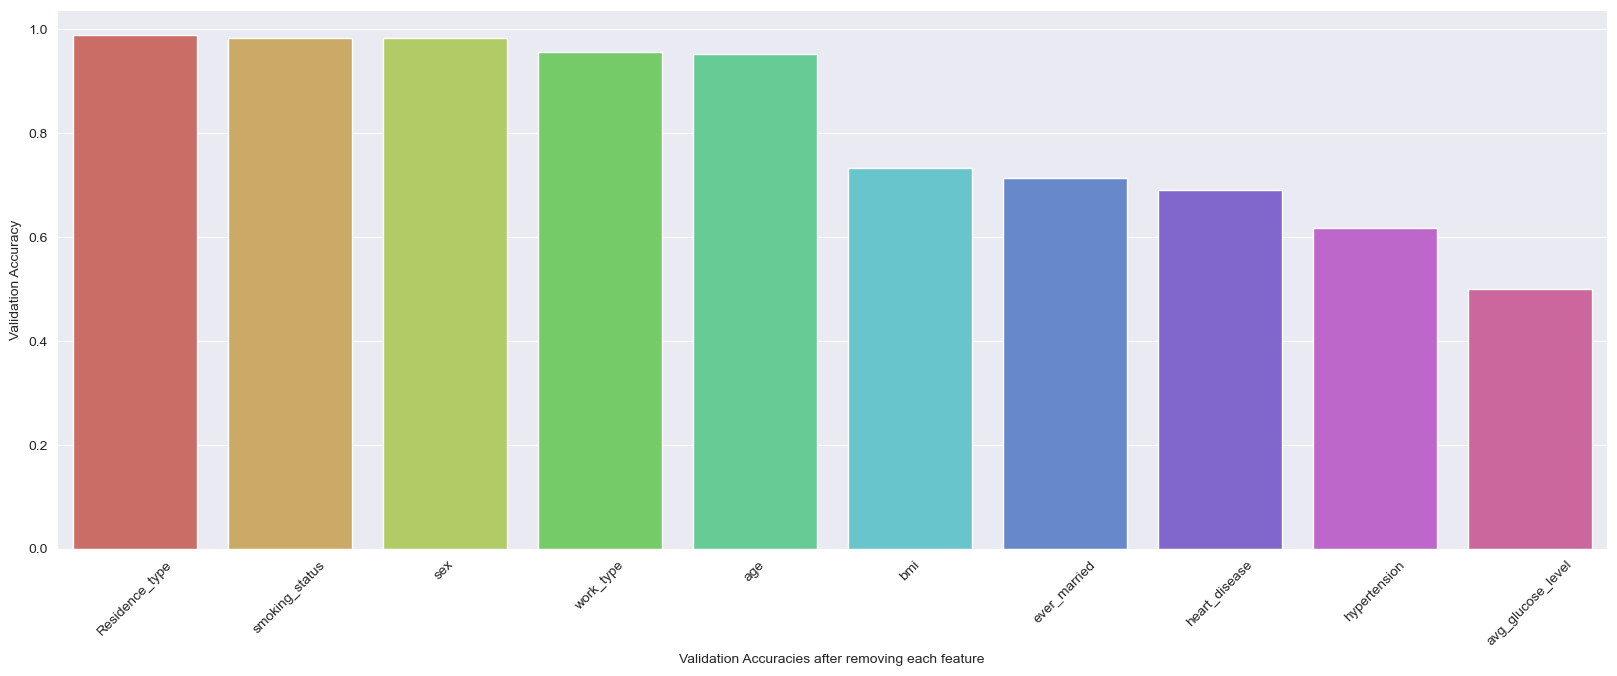

In [144]:
print("Accuracy")
x_labels = []
y_values = []
for feature in accuracy_data:
    feature_name = list(feature.keys())[0]
    accu = feature[feature_name]
    last_accuracy = accu[-1]
    x_labels.append(feature_name)
    y_values.append(last_accuracy)
    print(f"{feature_name}: {last_accuracy}")

plt.figure(figsize=(20, 7))
    
sns.barplot(x=x_labels, y=y_values, palette='hls')
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Accuracies after removing each feature')
plt.show()

print()

print("Validation Accuracy")
x_val_labels = []
y_val_values = []
for feature in Val_accuracy_data:
    feature_name = list(feature.keys())[0]
    accu = feature[feature_name]
    last_accuracy = accu[-1]
    x_val_labels.append(feature_name)
    y_val_values.append(last_accuracy)
    print(f"{feature_name}: {last_accuracy}")

plt.figure(figsize=(20, 7))
    
sns.barplot(x=x_val_labels, y=y_val_values, palette='hls')
plt.xticks(rotation=45)
plt.ylabel('Validation Accuracy')
plt.xlabel('Validation Accuracies after removing each feature')
plt.show()
# print("Val Accuracy")
# # last_Val_accuracy = []
# for feature in Val_accuracy_data:
#     feature_name = list(feature.keys())[0]
#     accu = feature[feature_name]
#     last_accuracy = accu[-1]
# #     last_Val_accuracy.append({f"Accuracy Removing {key}": accu})
#     print(f"{feature_name}: {last_accuracy}")
    